In [17]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as pathlib
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble

#The packages below will need to be installed for use.
# sorted_months_weekdays allows for easier manipulation of date fields
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
import swifter

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

#set variables for font sizes for plots. This will allow them to be consistent within the notebook
titleFont = 25
axisFont = 15
labelFont = 15

In [2]:
#read in the data file
data_file = 'us-accidents.zip'
weather_dic = 'WeatherDict.csv'

#BC's filepaths
filepath_BC = '/home/jbcroom/'
filepath_BC2 = 'C:/RAI/'

#AR's filepaths
filepath_AR = 'C:/Users/Allison/JupyterNotebook/Data/'

#HB's filepaths
filepath_JB = ''

#SO's filepaths
filepath_SO = ''

#Get the information for the data file
datafile_pathBC = pathlib.Path(filepath_BC + weather_dic)
datafile_pathBC2 = pathlib.Path(filepath_BC2 + weather_dic)
datafile_pathAR = pathlib.Path(filepath_AR + weather_dic)
datafile_pathJB = pathlib.Path(filepath_JB + weather_dic)
datafile_pathSO = pathlib.Path(filepath_SO + weather_dic)

#Check to where the file exists and set the filepath to load the data. 
if (datafile_pathBC.exists):
    weatherDic = filepath_BC + weather_dic
elif (datafile_pathBC2.exists):
    weatherDic = filepath_BC2 + weather_dic
elif (datafile_pathAR.exists):
    weatherDic = filepath_AR + weather_dic
elif (datafile_pathJB.exists):
    weatherDic = filepath_JB + weather_dic
elif (datafile_pathSO.exists):
    weatherDic = filepath_SO + weather_dic

#Get the information for the data file
datafile_pathBC = pathlib.Path(filepath_BC + data_file)
datafile_pathBC2 = pathlib.Path(filepath_BC2 + data_file)
datafile_pathAR = pathlib.Path(filepath_AR + data_file)
datafile_pathJB = pathlib.Path(filepath_JB + data_file)
datafile_pathSO = pathlib.Path(filepath_SO + data_file)

#Check to where the file exists and set the filepath to load the data. 
if (datafile_pathBC.exists):
    finalpath = filepath_BC + data_file
elif (datafile_pathBC2.exists):
    finalpath = filepath_BC2 + data_file
elif (datafile_pathAR.exists):
    finalpath = filepath_AR + data_file
elif (datafile_pathJB.exists):
    finalpath = filepath_JB + data_file
elif (datafile_pathSO.exists):
    finalpath = filepath_SO + data_file

#load the datafile
df = pd.read_csv(filepath_AR + data_file)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df=df.set_index('ID')

In [4]:
df=df.loc[df['State']=='TX']
df.head()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-261009,MapQuest,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,NaN,NaN,0.01,Accident on RM-2222 Northland Dr at Mo Pac Exp...,NaN,Mopac Expy S,R,Austin,Travis,TX,78731,US,US/Central,KATT,2016-11-30 15:51:00,66.0,NaN,24.0,30.01,10.0,NNW,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-261010,MapQuest,201.0,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,NaN,NaN,0.00,Accident on Grand Canyon Dr between Westheimer...,1128.0,E Saint Johns Ave,L,Austin,Travis,TX,78752-2826,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-261011,MapQuest,201.0,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,NaN,NaN,0.00,Accident on Saint Johns Ave at Cameron Rd.,7197.0,Cameron Rd,R,Austin,Travis,TX,78752,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
A-261012,MapQuest,201.0,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,Hanger Cutoff Rd,R,Fort Worth,Tarrant,TX,76135,US,US/Central,KAWN,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-261013,MapQuest,201.0,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,I-820 N,R,Fort Worth,Tarrant,TX,76118,US,US/Central,KFWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df2 = df.select_dtypes(include=['float64','int64'])
df2 = df2.join(df[['Start_Time']])
df2 = df2.drop(columns=['End_Lat','End_Lng','TMC','Distance(mi)','Number'])
df2 = df2.sort_values("Start_Time")
df2.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time
ID,,,,,,,,,,,
A-300356,2,32.860638,-96.719559,90.0,NaN,57.0,29.77,10.0,10.4,NaN,2016-06-14 20:06:43
A-300355,2,30.335411,-97.703049,89.1,NaN,61.0,29.80,10.0,5.8,NaN,2016-06-14 20:17:03
A-300359,2,29.757492,-95.365791,86.0,NaN,66.0,29.84,8.0,9.2,NaN,2016-06-14 20:21:49
A-300358,2,29.821486,-95.368080,84.2,NaN,70.0,29.84,8.0,9.2,NaN,2016-06-14 20:26:55
A-300357,2,32.871536,-96.683105,88.0,NaN,61.0,29.78,10.0,8.1,NaN,2016-06-14 20:49:39


In [6]:
print(df2.shape)

df3 = df2.dropna(axis=0,
                 how='all',
                 subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'])

print(df3.shape)

(298062, 11)
(292557, 11)


In [7]:
import datetime as dt

df3['Start_Month']=df3['Start_Time']

df3[['Start_Month'] ]= df3[["Start_Month"]].apply(lambda x : x.str[5:7])
df3.head()

C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Allison\Miniconda3\lib\site-packages\pandas\core\frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time,Start_Month
ID,,,,,,,,,,,,
A-300356,2,32.860638,-96.719559,90.0,NaN,57.0,29.77,10.0,10.4,NaN,2016-06-14 20:06:43,06
A-300355,2,30.335411,-97.703049,89.1,NaN,61.0,29.80,10.0,5.8,NaN,2016-06-14 20:17:03,06
A-300359,2,29.757492,-95.365791,86.0,NaN,66.0,29.84,8.0,9.2,NaN,2016-06-14 20:21:49,06
A-300358,2,29.821486,-95.368080,84.2,NaN,70.0,29.84,8.0,9.2,NaN,2016-06-14 20:26:55,06
A-300357,2,32.871536,-96.683105,88.0,NaN,61.0,29.78,10.0,8.1,NaN,2016-06-14 20:49:39,06


In [117]:
# df_final = df3.drop(columns=['Severity'])
df_final = df3
df_final['Wind_Chill(F)']=df_final['Wind_Chill(F)'].fillna(df_final['Temperature(F)'])
df_final['Wind_Speed(mph)']=df_final['Wind_Speed(mph)'].fillna(0)
df_final['Precipitation(in)']=df_final['Precipitation(in)'].fillna(0)
df_final.head()

C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time,Start_Month
ID,,,,,,,,,,,,
A-300356,2,32.860638,-96.719559,90.0,90.0,57.0,29.77,10.0,10.4,0.0,2016-06-14 20:06:43,06
A-300355,2,30.335411,-97.703049,89.1,89.1,61.0,29.80,10.0,5.8,0.0,2016-06-14 20:17:03,06
A-300359,2,29.757492,-95.365791,86.0,86.0,66.0,29.84,8.0,9.2,0.0,2016-06-14 20:21:49,06
A-300358,2,29.821486,-95.368080,84.2,84.2,70.0,29.84,8.0,9.2,0.0,2016-06-14 20:26:55,06
A-300357,2,32.871536,-96.683105,88.0,88.0,61.0,29.78,10.0,8.1,0.0,2016-06-14 20:49:39,06


In [118]:
df_final['Temperature(F)'].isnull().values.any()

True

In [119]:
winter = ['12','01','02']
spring = ['03','04','05']
summer = ['06','07','08']
fall = ['09','10','11']

df_winter = df_final[df_final.Start_Month.isin(winter)]
df_spring = df_final[df_final.Start_Month.isin(spring)]
df_summer = df_final[df_final.Start_Month.isin(summer)]
df_fall = df_final[df_final.Start_Month.isin(fall)]

df_winter = df_winter.fillna(df.median())
df_spring = df_spring.fillna(df.median())
df_summer = df_summer.fillna(df.median())
df_fall = df_fall.fillna(df.median())

df_winter = df_winter.sort_values("Start_Time")
df_spring = df_spring.sort_values("Start_Time")
df_summer = df_summer.sort_values("Start_Time")
df_fall = df_fall.sort_values("Start_Time")

seasons = [df_winter, df_spring, df_summer, df_fall]

for s in seasons :
    print(s.shape)
    

df_fall.head()

(70374, 12)
(60899, 12)
(72879, 12)
(88405, 12)


,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time,Start_Month
ID,,,,,,,,,,,,
A-2274266,2,32.853250,-96.562630,75.6,75.6,92.0,29.96,10.0,3.5,0.0,2016-09-01 03:54:48,09
A-2274267,2,29.520510,-98.486184,73.9,73.9,85.0,29.89,10.0,5.8,0.0,2016-09-01 04:40:14,09
A-2274268,3,29.887130,-95.412060,78.1,78.1,87.0,29.88,9.0,0.0,0.0,2016-09-01 04:53:39,09
A-2274270,2,29.517990,-98.478830,73.9,73.9,85.0,29.89,10.0,5.8,0.0,2016-09-01 05:04:47,09
A-298155,3,29.395046,-98.478073,75.9,75.9,82.0,29.88,10.0,5.8,0.0,2016-09-01 05:24:38,09


In [120]:
train_size = int(len(df_winter) * 0.5)
winter_train, winter_test = df_winter[0:train_size], df_winter[train_size:len(df_winter)]

train_size = int(len(df_spring) * 0.5)
spring_train, spring_test = df_spring[0:train_size], df_spring[train_size:len(df_spring)]

train_size = int(len(df_summer) * 0.5)
summer_train, summer_test = df_summer[0:train_size], df_summer[train_size:len(df_summer)]

train_size = int(len(df_fall) * 0.5)
fall_train, fall_test = df_fall[0:train_size], df_fall[train_size:len(df_fall)]

In [121]:
print(winter_train['Start_Month'].value_counts(normalize=True) )
print(winter_test['Start_Month'].value_counts(normalize=True) )

print(spring_train['Start_Month'].value_counts(normalize=True) )
print(spring_test['Start_Month'].value_counts(normalize=True) )

print(summer_train['Start_Month'].value_counts(normalize=True) )
print(summer_test['Start_Month'].value_counts(normalize=True) )

print(fall_train['Start_Month'].value_counts(normalize=True) )
print(fall_test['Start_Month'].value_counts(normalize=True) )

12    0.423764
01    0.375934
02    0.200301
Name: Start_Month, dtype: float64
02    0.387785
12    0.368346
01    0.243868
Name: Start_Month, dtype: float64
03    0.512266
04    0.304509
05    0.183224
Name: Start_Month, dtype: float64
05    0.432644
04    0.389163
03    0.178194
Name: Start_Month, dtype: float64
08    0.400752
07    0.326738
06    0.272510
Name: Start_Month, dtype: float64
08    0.386800
07    0.335401
06    0.277799
Name: Start_Month, dtype: float64
11    0.345640
10    0.335641
09    0.318719
Name: Start_Month, dtype: float64
10    0.359704
11    0.342217
09    0.298079
Name: Start_Month, dtype: float64


In [122]:
df_final.groupby('Start_Month')['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'].mean()


C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Start_Month,,,,,,,
01,53.213969,51.599688,62.603381,30.150016,8.996866,8.217076,0.003734
02,59.558123,58.605524,71.626775,30.047779,7.915835,8.762108,0.004176
03,65.249162,64.935361,59.233454,30.076630,9.162355,9.305004,0.003041
04,69.904821,69.840523,62.496088,29.764512,9.340548,9.389196,0.003454
05,77.844749,77.843837,64.659029,29.684511,9.309820,9.439791,0.006883
06,83.977163,83.975870,64.191303,29.716878,9.560378,8.043988,0.006655
07,87.438074,87.438074,58.739719,29.809637,9.718118,7.134508,0.004225
08,86.165162,86.165162,62.701211,29.808501,9.607738,6.609624,0.005865
09,82.225146,82.225146,65.206028,29.835436,9.571831,6.732992,0.006571


In [12]:
from sklearn import mixture

In [130]:
GM = mixture.GaussianMixture(n_components=4, 
                             covariance_type='full',
                            random_state=123,
                            verbose=1)

train = winter_train.drop(columns=['Start_Time'])
train.reset_index(level=0, inplace=True)
train.head()

,ID,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Month
0,A-2258465,3,32.68556,-97.24038,32.4,29.1,88.0,30.11,10.0,3.5,0.0,12
1,A-2258466,2,29.48945,-98.57804,46.0,46.0,58.0,30.05,10.0,0.0,0.0,12
2,A-2258468,3,32.72432,-96.76198,43.0,41.3,51.0,30.09,10.0,3.5,0.0,12
3,A-2258469,4,29.55822,-95.07508,51.8,51.8,50.0,30.10,10.0,0.0,0.0,12
4,A-2258470,4,29.55822,-95.07508,51.8,51.8,50.0,30.10,10.0,0.0,0.0,12


In [131]:
gmm = GM.fit(train.drop(columns=['ID','Severity']))

Initialization 0
  Iteration 10
Initialization converged: True


In [132]:
labels = gmm.predict(train.drop(columns=['ID','Severity']))
prob = gmm.predict_proba(train.drop(columns=['ID','Severity']))

In [133]:
print(labels)
print(prob)
print(np.unique(labels))

[0 2 0 ... 0 0 0]
[[9.99437053e-01 0.00000000e+00 0.00000000e+00 5.62947041e-04]
 [3.19317303e-07 4.61584751e-07 9.99999219e-01 3.22796758e-14]
 [9.99999999e-01 0.00000000e+00 0.00000000e+00 1.21205014e-09]
 ...
 [9.99993739e-01 0.00000000e+00 0.00000000e+00 6.26070411e-06]
 [9.99999141e-01 0.00000000e+00 0.00000000e+00 8.59287723e-07]
 [9.99993451e-01 0.00000000e+00 0.00000000e+00 6.54943218e-06]]
[0 1 2 3]


In [134]:
pd.DataFrame(data=labels, columns=['clusters']).head()

,clusters
0,0
1,2
2,0
3,2
4,2


In [135]:
# winter_train2 = pd.concat([winter_train, 
#            pd.DataFrame(data=labels, columns=['clusters']), 
#            pd.DataFrame(data=prob, columns=['cluster0','cluster1','cluster2','cluster3'])], axis = 1)

train2 = train.join(pd.DataFrame(data=labels, columns=['cluster']),
                                   how='left')
train2 = train2.join(pd.DataFrame(data=prob, columns=['cluster0','cluster1','cluster2','cluster3']),
                                   how='left')

train2.head()

,ID,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Month,cluster,cluster0,cluster1,cluster2,cluster3
0,A-2258465,3,32.68556,-97.24038,32.4,29.1,88.0,30.11,10.0,3.5,0.0,12,0,9.994371e-01,0.000000e+00,0.000000,5.629470e-04
1,A-2258466,2,29.48945,-98.57804,46.0,46.0,58.0,30.05,10.0,0.0,0.0,12,2,3.193173e-07,4.615848e-07,0.999999,3.227968e-14
2,A-2258468,3,32.72432,-96.76198,43.0,41.3,51.0,30.09,10.0,3.5,0.0,12,0,1.000000e+00,0.000000e+00,0.000000,1.212050e-09
3,A-2258469,4,29.55822,-95.07508,51.8,51.8,50.0,30.10,10.0,0.0,0.0,12,2,8.273465e-09,1.873984e-06,0.999998,2.654174e-16
4,A-2258470,4,29.55822,-95.07508,51.8,51.8,50.0,30.10,10.0,0.0,0.0,12,2,8.273465e-09,1.873984e-06,0.999998,2.654174e-16


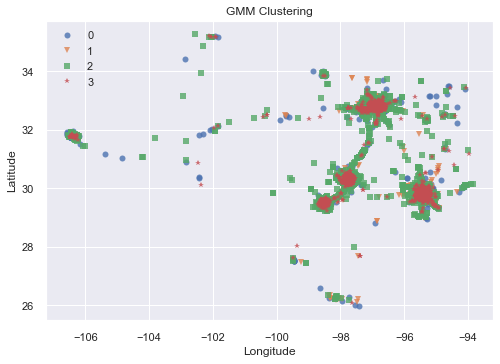

In [136]:
groups = train2.groupby("cluster")
markers = {0:'o', 1: 'v', 2: 's', 3: '*'}
for name, group in groups:
    plt.plot(group["Start_Lng"], group["Start_Lat"], marker=markers[name], linestyle="", label=name, alpha=.8)

plt.legend()
plt.title('GMM Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [137]:
groups['Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'].mean()

C:\Users\Allison\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
cluster,,,,,,,,
0,2.348890,37.270390,30.935378,59.675756,30.374176,10.007341,9.620573,0.000000
1,2.286170,62.160073,62.160073,83.724609,30.009013,6.207075,7.432306,0.000000
2,2.269219,60.939979,60.939979,54.649643,30.068314,10.000000,8.290336,0.000000
3,2.287625,49.428614,46.257116,90.405425,30.133292,5.137830,9.187328,0.050063


In [148]:
cluster_pct=train2['cluster'].value_counts(normalize=True)
cluster_pct_df=pd.DataFrame(cluster_pct)
cluster_pct_df.reset_index(level=0, inplace=True)
cluster_pct_df.rename(columns={'index':'cluster', 'cluster':'pct'}, inplace=True)
cluster_pct_df.sort_values(by='cluster', inplace=True)
cluster_pct_df

,cluster,pct
2,0,0.162588
1,1,0.187200
0,2,0.573735
3,3,0.076477


While ideally we would like to create 4 clusters to improve upon the 4 designations of severity already implemented, we will iterate over the number of clusters to see how many clusters are optimal. We will look at both BIC and AIC as they are useful metrics in comparing models, as we will compare the models by number of clusters.

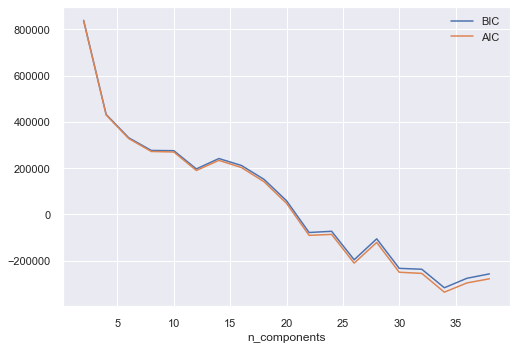

In [143]:
n_components = np.arange(2,40,step=2)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=['ID','Severity']))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=['ID','Severity'])) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train.drop(columns=['ID','Severity'])) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

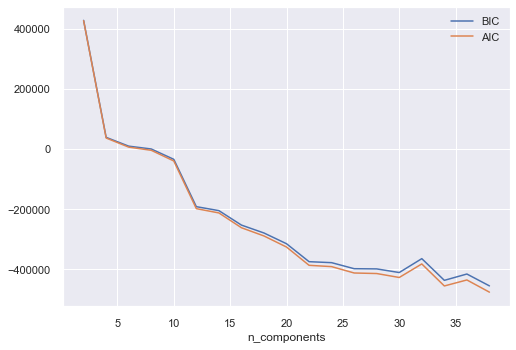

In [144]:
train = spring_train.drop(columns=['Start_Time'])
train.reset_index(level=0, inplace=True)
# train.head()

n_components = np.arange(2,40,step=2)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=['ID','Severity']))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=['ID','Severity'])) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train.drop(columns=['ID','Severity'])) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

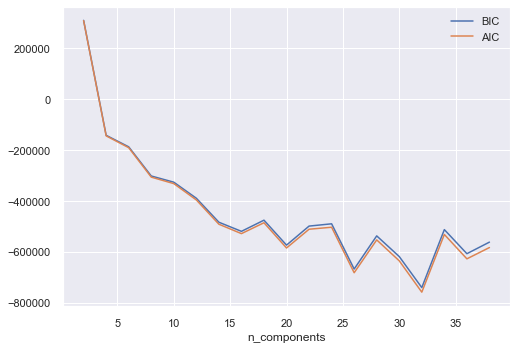

In [145]:
train = summer_train.drop(columns=['Start_Time'])
train.reset_index(level=0, inplace=True)
# train.head()

n_components = np.arange(2,40,step=2)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=['ID','Severity']))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=['ID','Severity'])) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train.drop(columns=['ID','Severity'])) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

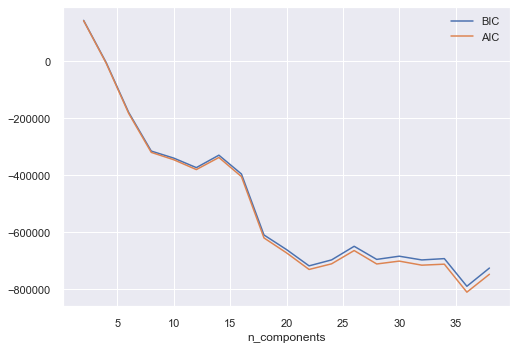

In [146]:
train = fall_train.drop(columns=['Start_Time'])
train.reset_index(level=0, inplace=True)
# train.head()

n_components = np.arange(2,40,step=2)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=['ID','Severity']))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=['ID','Severity'])) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train.drop(columns=['ID','Severity'])) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [34]:
scl_obj = StandardScaler()
scl_obj.fit(df_winter) 
df_winter_scaled= scl_obj.transform(df_winter)


array([[ 1.34078534, -0.14563117, -1.80446036, ..., -0.82861827,
        -0.12457938,  1.23135944],
       [-0.98571379, -0.80934338, -0.74116405, ..., -1.45609205,
        -0.12457938,  1.23135944],
       [ 1.36899935,  0.0917385 , -0.97571471, ..., -0.82861827,
        -0.12457938,  1.23135944],
       ...,
       [ 1.32633111,  0.01766815, -0.8193476 , ..., -0.55970094,
        -0.12457938,  1.23135944],
       [-0.82822993,  0.73807718, -0.19387919, ..., -0.55970094,
        -0.12457938,  1.23135944],
       [-0.76564299,  0.83308558, -0.19387919, ..., -0.55970094,
        -0.12457938,  1.23135944]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_winter_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

array([ 2.80310033,  0.69869041,  1.58710189, ...,  0.74666332,
       -0.04152193, -0.03187339])

In [27]:
finalDf = pd.concat([principalDf, pd.DataFrame(data=labels, columns=['clusters'])], axis = 1)
finalDf.head()

,principal component 1,principal component 2,clusters
0,2.803100,-0.046763,3
1,0.698690,-0.356244,1
2,1.587102,-0.937205,3
3,0.058664,-0.029597,1
4,0.058664,-0.029597,1


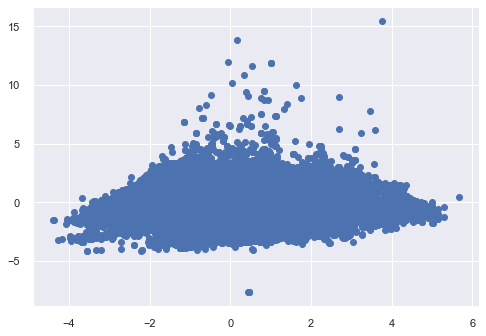

In [21]:
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'])

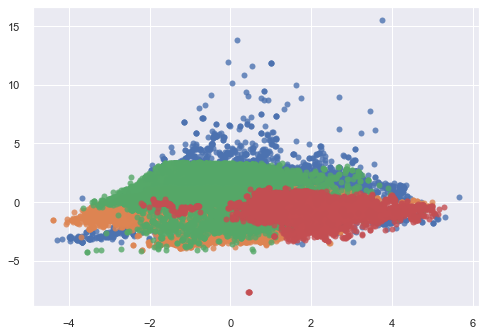

In [36]:
groups = finalDf.groupby("clusters")
for name, group in groups:
    plt.plot(group["principal component 1"], group["principal component 2"], marker="o", linestyle="", label=name, alpha=.8)